Code to look at the strcuture of a single real network using Trophic Analysis. 

Warning this code mixes Julia Plots and Matplotlib from Python so there is some code which may not run correctly at the end.

In [1]:
using Graphs, GraphIO, GraphPlot, Plots, SparseArrays




In [2]:
using GraphPlot

In [3]:
#gplot(g, layout=layout=circular_layout)

In [4]:
using LinearAlgebra, IterativeSolvers, Statistics
#Function which calculates Trophic Level

function get_levels(A)
    
    A= convert(Array{Float64}, A)
    
    w_in = vec(sum(A, dims=1))
   
    w_out= vec(sum(A, dims=2))
    
   
    
    u = w_in + w_out 
    
    v= w_in - w_out 
   
    Lambda=  diagm(u)-  A - transpose(A)
    
   
    Lambda[1,1]= 0 
    
    #h= bicgstabl(Lambda, v, 1)
    #h=  lsmr(Lambda, v)   
    
    h= Lambda \ v
    
    h= h .- minimum(h)
    
    return h
end

get_levels (generic function with 1 method)

In [5]:
#Function to calculate Trophic Incohrence 


function calc_troph_incoh(A)
    
    F=0

    for (x,y,v) in zip(findnz(A)...)
  
    
        F = F + v*(h[y] - h[x] -1 )^2
        println(h[y] - h[x])
    end
    
    F= F/sum(A)
    
end
    
    
    
    
    

calc_troph_incoh (generic function with 1 method)

In [6]:
using SparseArrays




In [7]:
using LinearAlgebra
using Arpack


#Data lists and initialising variables.
N=500



F_list = zeros(0)

num_diff_list= zeros(0)



eig_list= zeros(0)

eig_list_num_abs = zeros(0)

h_max_list= zeros(0)
entropy= zeros(0)
ipr= zeros(0)

entropy_list=zeros(0)
nu_normal_list= zeros(0)

ipr_list= zeros(0)

scale_spec_list = zeros(0)

nu_normal_list= zeros(0)
eigs_vecs =(0,0)
h=zeros(0)
diffs= zeros(0)

A= zeros(0,0)

#stop = 5


#f=open("net_celegans_neural.dat")
#net_moreno_highschool.dat
#Ythan96.dat
#el_verde.dat


#Loading the graph. This may be different depending on your path to the graph file and type. 

#Can also use generated graphs 
g = loadgraph("Ythan96.dat", "SimpleDiGraph", EdgeListFormat())
#g= path_digraph(1000)  
#g= erdos_renyi(1000, 10*1000, is_directed=true)
#add_edge!(g, 2, 1 )
#add_edge!(g, 1000, 999 )

#g =watts_strogatz(1000, 5, 0.95, is_directed = true)



#g = cycle_digraph(20)

#g= barabasi_albert(100, (10), 3, is_directed=true )

#barabasi_albert!(g, 1000, 20) 

N=nv(g)    
A = (adjacency_matrix(g))
print(A)    
L=sum(A)
    

    

        
    
    
    

   
    
    
h = get_levels(A)
    
F= calc_troph_incoh(A)    
append!( F_list, F ) 
    
eigs_vecs = eigvecs(Matrix(A))    
    
#println(maximum(real(eigvals(Matrix(A)))))

eigs_val=  eigvals(Matrix(A))   
    
    
spec_rad=  maximum(real(eigs_val))   
    
scale_fac=   maximum(real(eigvals(Matrix(A)*transpose(Matrix(A)))))  
    
nu= sum(abs2.(eigs_val))/norm(A,2)^2
    
entropy= zeros(0)
ipr= zeros(0)
for k in 1:N
        
        
        vec= abs2.(eigs_vecs[:,k])
        vec = filter(!iszero, vec)
        ent = sum(-vec.*(log.(vec)))
        
        
        vec1= abs.(eigs_vecs[:,k])
        
        ratio= sum(vec1.^4)/(sum(vec1.^2))^2
        
        append!(entropy,ent)
        append!(ipr,ratio)
    end  
        
append!(ipr_list, mean(ipr))
    

append!(entropy_list,mean(entropy)) 
    
append!( eig_list, spec_rad )  
    
    
append!(scale_spec_list, (spec_rad/sqrt(scale_fac)))
    
append!( eig_list_num_abs , maximum(real(eigvals((Matrix(A) + transpose(Matrix(A)))/2))  ))    
   
append!(h_max_list, maximum(h))  
    
    
append!(nu_normal_list, nu)
 
diffs= zeros(0)

#edges_1= []
#edges_2=[]

for (x,y,v) in zip(findnz(A)...)
  
    
        d= (h[y] - h[x] )
    
        append!( diffs, d )
    
       
        
    
        
    end    
   
 #num_diff=  count(p->(p>= 0), diffs)    
    
    num_diffs= sum(diffs .<= 0)/length(diffs)
    #num_diffs= 1
append!( num_diff_list, num_diffs )
    
F_round= round(F, digits=3)    
#display(plot(eigs(A,nev=500)[1], seriestype = :scatter, label = false ,  title="F = $F_round"))  

println(N)
println(sum(abs.((A)*eigs_vecs[:,5] - eigs_val[5]*eigs_vecs[:,5])))
g= SimpleDiGraph((A))
println(indegree(g))
println(is_connected(g))
println(F_list)
println(sum(A))
F_round= round(F_list[1], digits=3)
println(h)


⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠇⠆⠾⠇⠮⠀⠈⠸⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠞⡅⠀⠁⠀⠀⡅⠄⠀⠀⢨⡅⠀⣽⠁⠀⠈⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡇⠀⠀⠀⠁⠆⠃⠀⠀⢐⠁⠀⡀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣠⡇⠀⠄⠀⠀⡁⡀⠀⢀⢨⢄⠀⡈⠀⢀⠀⠀⠀
⠀⠀⠀⡀⠀⠀⠀⠀⠀⠀⠀⠀⢰⠀⠀⢀⠀⠀⠀⢰⢀⢰⠆⠀⠀⠀⠆⠇⠇⠀⠀⠈⡃⠀⠈⡀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸⠄⠀⠇⠁⠀⠀⠈⠀⢘⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠀⡈⠁⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠌⠄⠀⢐⣀⠄⠄⠤⠀⠀⠈⠈⠀⠈⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⣽⡅⠀⣩⣬⡅⡁⣧⠄⠀⢀⠠⠀⢠⢀⢀⢀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠠⡄⠀⠀⠀⣷⠇⠀⢉⢧⡲⡇⣿⠏⠤⠚⠀⠀⠸⠀⠷⠄⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⡀⠀⣀⠀⣀⠀⣀⠀⣇⣄⡀⠂⣴⡅⣆⣇⣤⣤⡰⡀⣀⣠⡄⢄⢀⡀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠟⡇⠈⠔⢿⠆⡇⠓⠅⠡⢰⠠⠀⣨⣠⠅⢀⢀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠁⠀⠀⠀⠁⠃⠈⡄⠀⠈⠀⠀⠀⠘⠀⠘⠀⠳
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠀⢸
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⢸
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⠀⠀⠀⠀⡀⠸⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢸
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠸
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀0.6191883389304731
0.7591849697759828
0.7771420382648413
1.108791926967907
0.8771132577598585
1.1721864253064882
1.0598063567241698
1.2588040624238603
0.5987025006328287
1.05883685

82
0.0
[0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 8, 5, 0, 2, 0, 6, 5, 4, 1, 6, 3, 0, 0, 1, 7, 0, 4, 18, 23, 27, 1, 1, 1, 7, 8, 12, 13, 15, 2, 26, 1, 22, 10, 10, 1, 3, 4, 5, 2, 21, 10, 4, 1, 1, 8, 19, 6, 5, 7, 5, 1, 11, 1, 2, 2, 26]
true
[0.09683596938193005]
395
[0.0, 0.03039210116440752, 0.0918757345207313, 1.554018210170397, 1.002169256709595, 0.7461411718582347, 0.9671361946158791, 0.9700760842696282, 0.8858135765805352, 0.9795652842202573, 0.9401690378869878, 0.9783776985125543, 0.9912583226750097, 0.813760915267233, 0.8882805371045801, 0.9306773796323401, 0.9846492942374322, 0.69755481287733, 0.6795977443884715, 0.347947855685406, 0.5796265248934543, 0.28455335734682463, 0.3969334259291431, 0.19793572022945244, 0.900114111021431, 0.9396133490745116, 1.4567397826533128, 1.058836854416886, 1.100221109806386, 0.8708222796750278, 0.8022748874854881, 1.0782305236181582, 1.091559904000899, 1.03426724116814, 1.049013910649489, 1.0800361178978506, 0.95

Various plots of the spectra and then the eigenvectors of the specificed network.

In [8]:
eigs_val= eigvals(Matrix((A)))

#plot(real.(eigs), imag.(eigs), seriestype = :scatter, label = false ,  title="F = $F_round")

#plot(eigs_val, seriestype = :scatter, label = false ,  title="F = $F_round")

#savefig("Julia_low_mid_T_eigs_Bicon_4.pdf")

82-element Vector{Float64}:
 -0.6180339887498949
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  ⋮
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  0.0
  1.0
  1.0
  1.0
  1.618033988749895

In [9]:
core_number(g)

#using Plots, Pseudospectra, LinearAlgebra
#spectralportrait(A)
PyPlot.scatter(h,core_number(g))

LoadError: ArgumentError: graph must not have self-loops

┌ Warning: You are using Matplotlib 3.3.4, which is no longer
│ officialy supported by the Plots community. To ensure smooth Plots.jl
│ integration update your Matplotlib library to a version >= 3.4.0
│ 
│ If you have used Conda.jl to install PyPlot (default installation),
│ upgrade your matplotlib via Conda.jl and rebuild the PyPlot.
│ 
│ If you are not sure, here are the default instructions:
│ 
│ In Julia REPL:
│ ```
│ import Pkg;
│ Pkg.add("Conda")
│ import Conda
│ Conda.update()
│ Pkg.build("PyPlot")
│ ```
│ 
└ @ Plots /Users/niallrodgers/.julia/packages/Plots/SkUg1/src/backends/pyplot.jl:29


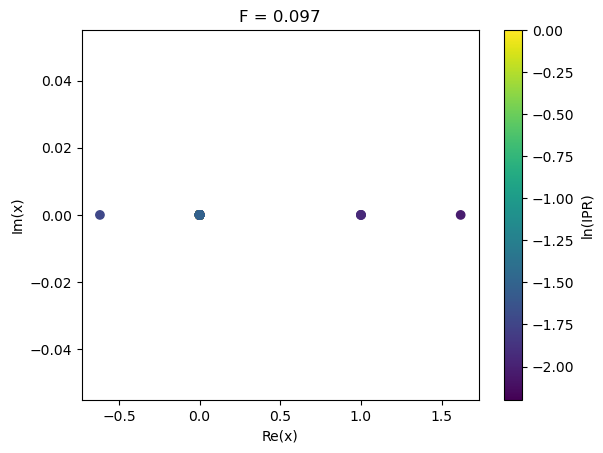

PyObject Text(0.5, 1.0, 'F = 0.097')

In [10]:

x=real.(eigs_val)

y=imag.(eigs_val)

using PyPlot

PyPlot.scatter(x,y, c=log.(ipr))

cbar= plt.colorbar()

cbar.set_label("ln(IPR)")

plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.title("F = $F_round")

#plt.savefig("IPR_yeast_genetic.dat.pdf")

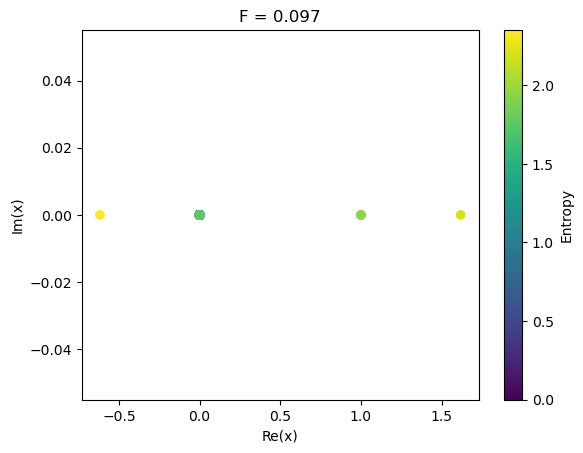

PyObject Text(0.5, 1.0, 'F = 0.097')

In [11]:
x=real.(eigs_val)

y=imag.(eigs_val)

#using PyPlot

PyPlot.scatter(x,y, c=entropy)

cbar= plt.colorbar()

cbar.set_label("Entropy")

plt.xlabel("Re(x)")
plt.ylabel("Im(x)")
plt.title("F = $F_round")

#plt.savefig("Ent_metabolic.pdf")

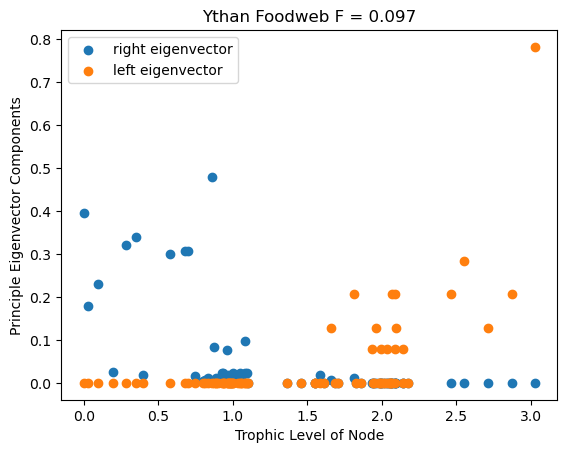

PyObject <matplotlib.legend.Legend object at 0x7f88095b0a60>

In [16]:
eigs_vecs[:,N]

x=h

y=abs.(real.(eigs_vecs[:,N]))


y2= abs.(eigvecs(Matrix(transpose(A)))[:,N])
using PyPlot

PyPlot.scatter(x,y, label="right eigenvector")
PyPlot.scatter(x,y2, label ="left eigenvector")
plt.ylabel("Principle Eigenvector Components")
plt.xlabel("Trophic Level of Node")
plt.title("Ythan Foodweb F = $F_round")
plt.legend(loc="best")
#plt.savefig("Randomgraph__left_right_eigenvector.pdf")

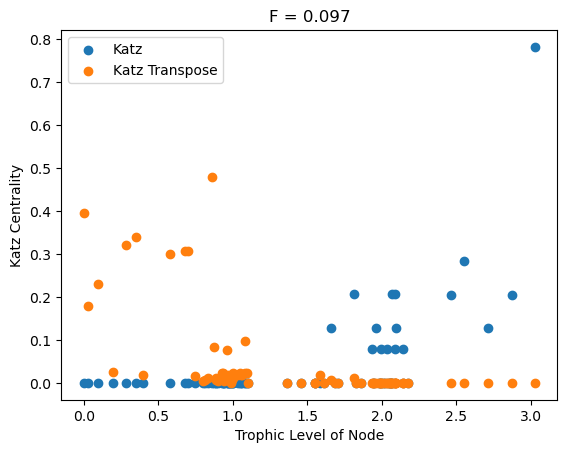

PyObject Text(0.5, 1.0, 'F = 0.097')

In [13]:
alpha = 1/eig_list[1] - 0.001
g_trans= SimpleDiGraph(transpose(A))

katz_cent= katz_centrality(g, alpha)


PyPlot.scatter(h,katz_cent , label="Katz")
katz_cent_trans= katz_centrality(g_trans, alpha)
PyPlot.scatter(h,katz_cent_trans, label="Katz Transpose")
plt.ylabel("Katz Centrality")
plt.legend(loc="best")
plt.xlabel("Trophic Level of Node")
plt.title("F = $F_round")
#plt.savefig("smalleworld_katz_2.png")

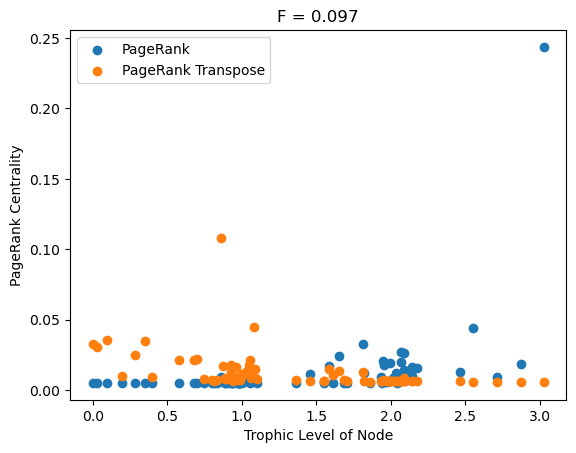

PyObject Text(0.5, 1.0, 'F = 0.097')

In [14]:
pagerank_cent= pagerank(g, 0.85, 100, 1.0e-10)


PyPlot.scatter(h,pagerank_cent, label="PageRank")
pagerank_cent_trans= pagerank(g_trans, 0.85, 100, 1.0e-10)
PyPlot.scatter(h,pagerank_cent_trans, label="PageRank Transpose")
plt.ylabel("PageRank Centrality")
plt.xlabel("Trophic Level of Node")
plt.legend(loc="best")
plt.title("F = $F_round")
#plt.savefig("smallworld_pageRank_2.png")

In [9]:

hits = abs.(eigvecs(Matrix(A*transpose(A)))[:,N])
#authority = transpose(A)*(eigvecs(Matrix(A*transpose(A)))[:,500])
authority= abs.(eigvecs(Matrix(transpose(A)*(A)))[:,N])
println(A==transpose(A))
PyPlot.scatter(h,hits , label="Hubs")
PyPlot.scatter(h,authority , label="Authority")
plt.legend(loc="best")
plt.title("F = $F_round")
plt.ylabel("HITS Centralities")
plt.xlabel("Trophic Level")
#plt.savefig("smallworld_HIts_2.png")

LoadError: BoundsError: attempt to access 0×0 Matrix{Float64} at index [1:0, 500]

In [10]:
A= convert(Array{Float64}, A)

w_in = vec(sum(A, dims=1))
   
w_out= vec(sum(A, dims=2))
    
u = w_in + w_out 
L =  diagm(u)-  A       
eigs_val_L= eigvals(((L)))
eigs_vecs_L = eigvecs(Matrix(A)) 

entropy_L= zeros(0)
ipr_L= zeros(0)
for k in 1:N
        
        
        vec= abs2.(eigs_vecs_L[:,k])
        vec = filter(!iszero, vec)
        ent = sum(-vec.*(log.(vec)))
        
        
        vec1= abs.(eigs_vecs_L[:,k])
        
        ratio= sum(vec1.^4)/(sum(vec1.^2))^2
        
        append!(entropy_L,ent)
        append!(ipr_L,ratio)
    end 

x=real.(eigs_val_L)

y=imag.(eigs_val_L)

#using PyPlot

PyPlot.scatter(x,y, c=log.(ipr_L))

cbar= plt.colorbar()

cbar.set_label("ln(IPR)")

plt.xlabel("Re(x)")
plt.ylabel("Im(x)")

plt.title("Laplacian Eigenvalues F = $F_round")
#plt.savefig("Lapacian_IPR_el_verde.pdf")    
#plot(eigs_val, seriestype = :scatter, label = false ,  title="F = $F_round")

LoadError: BoundsError: attempt to access 0×0 Matrix{Float64} at index [1:0, 1]

In [11]:
(eigs(A,nev=500)[1], seriestype = :scatter, label = false ,  title="F = $F_round")

#savefig("Arpack_Eigen_julia.pdf")

LoadError: syntax: invalid named tuple element "eigs(A, nev = 500)[1]" around In[11]:1

In [12]:
eig_cent= eigenvector_centrality(g)
deg_cent= degree_centrality(g)
in_cent= indegree_centrality(g)
out_cent=outdegree_centrality(g)
bet_cent=betweenness_centrality(g)
katz_cent= katz_centrality(g, 0.3)

pagerank_cent= pagerank(g, 0.85, 100, 1.0e-6)

LoadError: UndefVarError: eigenvector_centrality not defined

In [13]:
pr =  pagerank(g, 0.85, 100, 1.0e-6)

pr = filter(!iszero, pr)
    
#pr = pr*(1/(sum(pr)))
ent_pr = sum(-pr.*(log.(pr)))/log(N)

LoadError: UndefVarError: pagerank not defined

In [14]:
plot(h,in_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel="In Degree Centrality", label=false, title="F = $F_round")


#savefig("Path_in_degree.pdf")
#savefig("in_deg_cent_high_julia.pdf")





LoadError: UndefVarError: F_round not defined

In [15]:
plot(h,out_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel="Out Degree Centrality", label=false, title="F = $F_round")


#savefig("Path_out_degree.pdf")
#savefig("out_deg_cent_high_julia.pdf")


LoadError: UndefVarError: F_round not defined

In [16]:
plot(h,in_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel=" Degree Centrality", label=false, title="F = $F_round")


#savefig("Path_degree.pdf")
#savefig("deg_cent_high_julia.pdf")

LoadError: UndefVarError: F_round not defined

In [17]:
plot(h,eig_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel="Eigenvector Centrality", label=false, title="F = $F_round")


#savefig("Path_eigenvector.pdf")
#savefig("Eigen_cent_Food_web_pdf")

LoadError: UndefVarError: F_round not defined

In [18]:


plot(h,bet_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel=" Betweeness Centrality", label=false, title="F = $F_round")


#savefig("Path_betweeness.pdf")
#savefig("bet_deg_cent_high_julia.pdf")

LoadError: UndefVarError: F_round not defined

In [19]:
plot(h,pagerank_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel=" Pagerank", label=false, title="F = $F_round")


#savefig("Path_pagerank.pdf")
#savefig("pagerannk_deg_cent_high_julia.pdf")

LoadError: UndefVarError: F_round not defined

In [20]:
plot(h,katz_cent,seriestype = :scatter, xlabel="Trophic Level", ylabel=" Katz", label=false, title="F = $F_round")


#savefig("Path_katz.pdf")
#savefig("katz_deg_cent_high_julia.pdf")

LoadError: UndefVarError: F_round not defined

In [21]:
plot(h,seriestype = :scatter, ylabel="Trophic Level", xlabel=" Node Label", label=false,)

#savefig("Path_trophic_level.pdf")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/niallrodgers/.julia/packages/PyCall/7a7w0/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'Line2D' object has no property 'seriestype'")
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2840, in plot
    return gca().plot(
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 1743, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 273, in __call__
    yield from self._plot_args(this, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in _plot_args
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in <listcomp>
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 312, in _makeline
    seg = mlines.Line2D(x, y, **kw)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/lines.py", line 390, in __init__
    self.update(kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/artist.py", line 996, in update
    raise AttributeError(f"{type(self).__name__!r} object "


In [22]:
using Arpack
typeof(eigs)
eigs_val= eigvals(Matrix((A)))

#plot(real.(eigs), imag.(eigs), seriestype = :scatter, label = false ,  title="F = $F_round")

plot(eigs_val, seriestype = :scatter, label = false ,  title="F = $F_round")

LoadError: UndefVarError: F_round not defined

In [23]:
using Plots

#histogram(diffs, xlabel= "Level Differences", ylabel="Frequency", title=(string("N=1000 k=10 F=",  string(round(F,digits = 3) ))))

#savefig("Generated_Level_distribution_high.pdf")

┌ Warning: You are using Matplotlib 3.3.4, which is no longer
│ officialy supported by the Plots community. To ensure smooth Plots.jl
│ integration update your Matplotlib library to a version >= 3.4.0
│ 
│ If you have used Conda.jl to install PyPlot (default installation),
│ upgrade your matplotlib via Conda.jl and rebuild the PyPlot.
│ 
│ If you are not sure, here are the default instructions:
│ 
│ In Julia REPL:
│ ```
│ import Pkg;
│ Pkg.add("Conda")
│ import Conda
│ Conda.update()
│ Pkg.build("PyPlot")
│ ```
│ 
└ @ Plots /Users/niallrodgers/.julia/packages/Plots/SkUg1/src/backends/pyplot.jl:29


In [24]:
using Plots

plot(T_list,F_list, seriestype = :scatter, legend = false, xlabel= "Temperatue",

ylabel="Trophic Incoherence", title= "Julia Network Generation")

#savefig("Julia_generation_2.pdf")

LoadError: UndefVarError: T_list not defined

In [25]:

using Polynomials

x=F_list

y= num_diff_list


plot(F_list, num_diff_list, seriestype = :scatter, legend = :topleft, xlabel= "Trophic Incoherence",

ylabel="Fraction of Negative Edges", title= "Fraction of Negative Edges N=500 k=20", label= "Networks")



#savefig("NegativeEdges_N=500.pdf")


LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/niallrodgers/.julia/packages/PyCall/7a7w0/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'Line2D' object has no property 'ylabel'")
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2840, in plot
    return gca().plot(
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 1743, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 273, in __call__
    yield from self._plot_args(this, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in _plot_args
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in <listcomp>
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 312, in _makeline
    seg = mlines.Line2D(x, y, **kw)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/lines.py", line 390, in __init__
    self.update(kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/artist.py", line 996, in update
    raise AttributeError(f"{type(self).__name__!r} object "


In [26]:
#println(eig_list)

plot(F_list, eig_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Abscissa of Networks", title= "Spectral Properties", label= "Spectral" )

plot!(F_list, eig_list_num_abs, seriestype = :scatter, label = "Numerical")
#savefig("Abscissa_of_Networks.pdf")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/niallrodgers/.julia/packages/PyCall/7a7w0/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'Line2D' object has no property 'ylabel'")
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2840, in plot
    return gca().plot(
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 1743, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 273, in __call__
    yield from self._plot_args(this, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in _plot_args
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in <listcomp>
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 312, in _makeline
    seg = mlines.Line2D(x, y, **kw)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/lines.py", line 390, in __init__
    self.update(kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/artist.py", line 996, in update
    raise AttributeError(f"{type(self).__name__!r} object "


In [27]:
plot(F_list, eig_list_num_abs -eig_list , seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Numerical
Abscissa Minus Spectral Radius", title= "Measures of Non-Normality")
#savefig("Difference_of__Abscissa_of_Networks.pdf")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/niallrodgers/.julia/packages/PyCall/7a7w0/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'Line2D' object has no property 'ylabel'")
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2840, in plot
    return gca().plot(
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 1743, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 273, in __call__
    yield from self._plot_args(this, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in _plot_args
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in <listcomp>
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 312, in _makeline
    seg = mlines.Line2D(x, y, **kw)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/lines.py", line 390, in __init__
    self.update(kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/artist.py", line 996, in update
    raise AttributeError(f"{type(self).__name__!r} object "


In [28]:
plot(F_list, h_max_list, seriestype = :scatter, legend = false, xlabel= "Trophic Incoherence",

ylabel="Maximum Trophic Level with min at zero", title= "Level Distrubution", label= "Spectral" )

#savefig("Maximum_Level_Numerical_Networks.pdf")



LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/niallrodgers/.julia/packages/PyCall/7a7w0/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'Line2D' object has no property 'ylabel'")
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2840, in plot
    return gca().plot(
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 1743, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 273, in __call__
    yield from self._plot_args(this, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in _plot_args
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in <listcomp>
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 312, in _makeline
    seg = mlines.Line2D(x, y, **kw)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/lines.py", line 390, in __init__
    self.update(kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/artist.py", line 996, in update
    raise AttributeError(f"{type(self).__name__!r} object "


In [29]:
plot(F_list, scale_spec_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Scaled Spectral Radius", title= "Spectral Properties", label= "Networks Generated" )

F_plot= LinRange(0, 1, 1000)

plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))/2), label= "exp((1 - 1/F)/2)", lw=3)

#savefig("scaled_spec_radius_good.pdf")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/niallrodgers/.julia/packages/PyCall/7a7w0/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'Line2D' object has no property 'ylabel'")
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2840, in plot
    return gca().plot(
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 1743, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 273, in __call__
    yield from self._plot_args(this, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in _plot_args
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in <listcomp>
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 312, in _makeline
    seg = mlines.Line2D(x, y, **kw)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/lines.py", line 390, in __init__
    self.update(kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/artist.py", line 996, in update
    raise AttributeError(f"{type(self).__name__!r} object "


In [30]:
plot(F_list, nu_normal_list, seriestype = :scatter, legend = :bottomright, xlabel= "Trophic Incoherence",

ylabel="Normality, nu", title= "Normality", label= "Networks Generated" )



plot!(F_plot,  exp.(((1 .- 1 ./ F_plot))), label= "exp((1 - 1/F))", lw=3)

#savefig("nu_normlity_N=500_k=20,pdf")

LoadError: PyError ($(Expr(:escape, :(ccall(#= /Users/niallrodgers/.julia/packages/PyCall/7a7w0/src/pyfncall.jl:43 =# @pysym(:PyObject_Call), PyPtr, (PyPtr, PyPtr, PyPtr), o, pyargsptr, kw))))) <class 'AttributeError'>
AttributeError("'Line2D' object has no property 'ylabel'")
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/pyplot.py", line 2840, in plot
    return gca().plot(
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_axes.py", line 1743, in plot
    lines = [*self._get_lines(*args, data=data, **kwargs)]
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 273, in __call__
    yield from self._plot_args(this, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in _plot_args
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 418, in <listcomp>
    return [func(x[:, j % ncx], y[:, j % ncy], kw, kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/axes/_base.py", line 312, in _makeline
    seg = mlines.Line2D(x, y, **kw)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/lines.py", line 390, in __init__
    self.update(kwargs)
  File "/Users/niallrodgers/.julia/conda/3/lib/python3.9/site-packages/matplotlib/artist.py", line 996, in update
    raise AttributeError(f"{type(self).__name__!r} object "


In [31]:
greedy_color(g; sort_degree=false, reps = 10)


LoadError: UndefVarError: greedy_color not defined

In [32]:
g2 = path_digraph(1000)
#add_edge!(g2, 381, 54)

add_edge!(g2, 500, 300)



A= (adjacency_matrix(g2))

#print(A)
e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )

#savefig("Path_with_1_short_middle_cycle_eigs_julia.pdf")

LoadError: UndefVarError: path_digraph not defined

In [33]:
g2= cycle_digraph(1000)

A= (adjacency_matrix(g2))

#print(A)
e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )

#savefig("Cyclce_eigenvalues_julia.pdf")


LoadError: UndefVarError: cycle_digraph not defined

In [34]:
g2= watts_strogatz(1000, 10, 0.8, is_directed = true)


A= (adjacency_matrix(g2))

#print(A)
e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )


#savefig("Small_world_eiges_julia_n_1000_k_10_beta_0.8.pdf")

LoadError: UndefVarError: watts_strogatz not defined

In [35]:
g2= barabasi_albert(1000,  100, is_directed=true, seed=123)


A= (adjacency_matrix(g2))
println(A)
#print(A)
e= eigvals(Matrix((A)))
print(e)
plot(e, seriestype = :scatter, label = false )

LoadError: UndefVarError: barabasi_albert not defined

In [36]:
g2= random_regular_digraph(1000, 20)


A= (adjacency_matrix(g2))


e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )

LoadError: UndefVarError: random_regular_digraph not defined

In [37]:
g2= erdos_renyi(1000, 10*1000, is_directed=true)


A= (adjacency_matrix(g2))


e= eigvals(Matrix((A)))

plot(e, seriestype = :scatter, label = false )

#savefig("Random_graph_eigs_julia.pdf")

LoadError: UndefVarError: erdos_renyi not defined